### Read in Data - UrbanSounds8K - https://www.kaggle.com/code/prabhavsingh/urbansound8k-classification

In [118]:
import pandas as pd
import numpy as np

data = pd.read_csv("Saraalemandi_All_Audio_10000.csv")

print("Dataset shape:", data.shape)
print(data.head())

X = np.array([np.array(eval(row)) for row in data['audio_features']])
y = data['is_drone'].values 


Dataset shape: (20744, 2)
                                      audio_features  is_drone
0  [-1131.370850, 0.000000, 0.000000, 0.000000, 0...         0
1  [-1131.370850, 0.000000, 0.000000, 0.000000, 0...         0
2  [-480.998810, 16.877712, -53.211430, -13.36473...         0
3  [-1131.370850, 0.000000, 0.000000, 0.000000, 0...         0
4  [-1131.370850, 0.000000, 0.000000, 0.000000, 0...         0


### Check That Dataset is correct

All rows have exactly 40 values.
Class Distribution:
Non-Drone    10372
Drone        10372
Name: count, dtype: int64


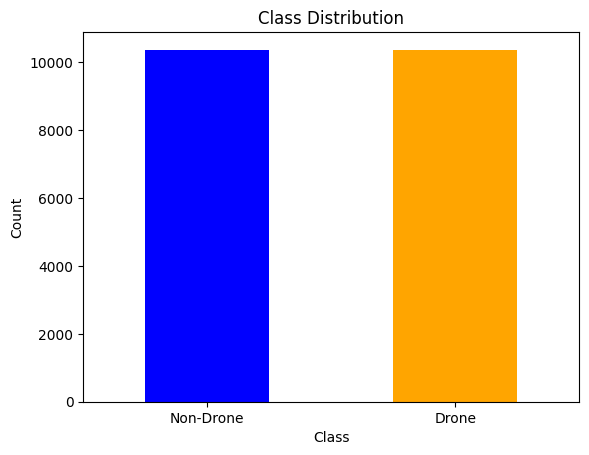

In [119]:
import pandas as pd

# Load your dataset
data = pd.read_csv("Saraalemandi_All_Audio_10000.csv")  # Replace with your file path

# Load the dataset
data_path = "Saraalemandi_All_Audio_10000.csv"  # Replace with your file path
data = pd.read_csv(data_path)

# Function to verify each row has 40 values
def verify_row_length(row, target_length=40):
    try:
        # Convert string representation to an array
        row_array = np.array(eval(row))
        # Check if the array has the correct length
        return len(row_array) == target_length
    except Exception as e:
        print(f"Error processing row: {row}, Error: {e}")
        return False

# Apply the verification function to the dataset
data['is_valid'] = data['audio_features'].apply(verify_row_length)

# Check for invalid rows
invalid_rows = data[~data['is_valid']]

# Output results
if invalid_rows.empty:
    print("All rows have exactly 40 values.")
else:
    print(f"Found {len(invalid_rows)} rows with incorrect length:")
    print(invalid_rows)

# Count occurrences of each label in the 'is_drone' column, ensuring missing labels show as 0
label_counts = data['is_drone'].value_counts()

# Ensure both labels (0: Non-Drone, 1: Drone) are always present
label_counts = label_counts.reindex([0, 1], fill_value=0)

# Rename indices for clarity
label_counts.index = ['Non-Drone', 'Drone']

# Print the counts
print("Class Distribution:")
print(label_counts)

# Optional: Visualize the class distribution with a bar chart
import matplotlib.pyplot as plt

label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

### Split and Train Data

In [120]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

# Check for overlap between train and test sets
overlap = set(map(tuple, X_train)).intersection(set(map(tuple, X_test)))
print(f"Overlap between training and test sets: {len(overlap)}")

import numpy as np

# Calculate feature variances
variances = np.var(X_train, axis=0)
print(f"Number of features with zero variance: {np.sum(variances == 0)}")
print(f"Minimum variance: {np.min(variances)}")

Training data shape: (16595, 40)
Testing data shape: (4149, 40)
Overlap between training and test sets: 1
Number of features with zero variance: 0
Minimum variance: 10.92928986091273


### CNN Creation

In [121]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1], 1)),  #Matches feature length (1D)
    #32 filters, a good length, kernel size of 3 is good for audio
    layers.Conv1D(32, kernel_size=3, activation='relu'), #convolutional layer
    layers.MaxPooling1D(pool_size=2), #pooling layer
    #Increase of features 
    layers.Conv1D(64, kernel_size=3, activation='relu'), #convolutional layer
    layers.MaxPooling1D(pool_size=2), #pooling layer
    #converts to 1D vector
    layers.Flatten(),
    #128 neurons is a good size
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5), # Helps prevent overfitting
    #Sigmoid is chosen as it outputs a simple 1 or 0 
    layers.Dense(1, activation='sigmoid')   
])

#Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_18 (Conv1D)              │ (None, 38, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_18 (MaxPooling1D) │ (None, 19, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 17, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_19 (MaxPooling1D) │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,129 (281.75 KB)

 Trainable params: 72,129 (281.75 KB)

 Non-trainable params: 0 (0.00 B)

### Reshape CNN

In [122]:
#Reshape from 1D to 3D
X_train_cnn = np.array(X_train).reshape(-1, len(X_train[0]), 1)
X_test_cnn = np.array(X_test).reshape(-1, len(X_test[0]), 1)

print(f"Shape of X_train_cnn: {X_train_cnn.shape}")
print(f"Shape of X_test_cnn: {X_test_cnn.shape}")

y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)
print("Unique Predictions:", np.unique(y_pred))


Shape of X_train_cnn: (16595, 40, 1)
Shape of X_test_cnn: (4149, 40, 1)
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Unique Predictions: [1]


### Fit Model

In [123]:
history = model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9607 - loss: 0.3141 - val_accuracy: 1.0000 - val_loss: 2.8535e-05
Epoch 2/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.8292e-04 - val_accuracy: 1.0000 - val_loss: 7.4257e-06
Epoch 3/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 4.9103e-05 - val_accuracy: 1.0000 - val_loss: 3.4155e-06
Epoch 4/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.3759e-05 - val_accuracy: 1.0000 - val_loss: 1.0506e-06
Epoch 5/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 2.3293e-05 - val_accuracy: 1.0000 - val_loss: 3.2144e-06
Epoch 6/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.0618e-04
Epoch 7/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 5.6271e-05 - val_accuracy: 1.0000 - val_loss: 2.0987e-07
Epoch 8/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - ac

### Summary of CNN Model

130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.9500e-07
Test Loss: 0.0000
Test Accuracy: 1.0000


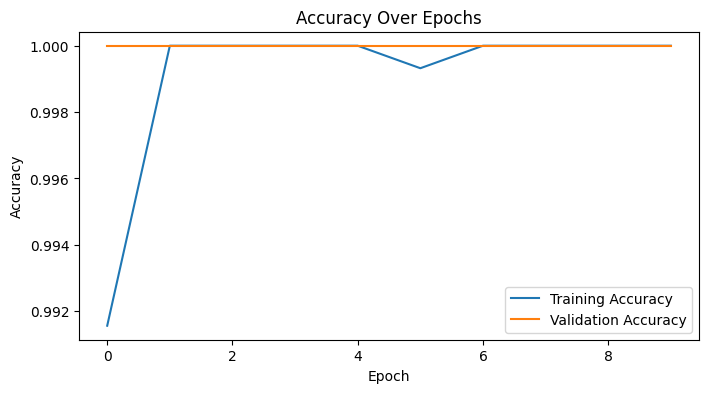

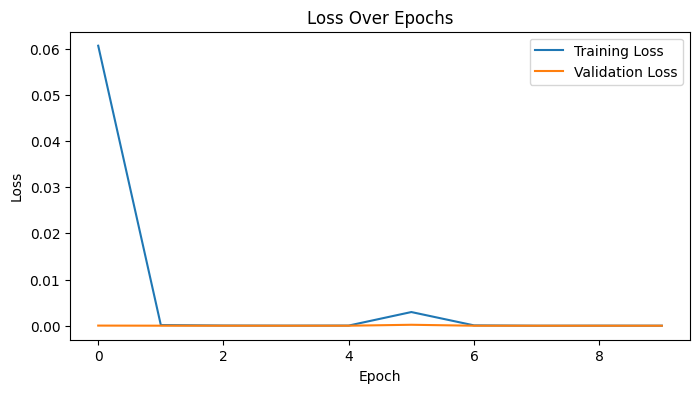

In [124]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 1.9500e-07
Test Loss: 0.0000
Test Accuracy: 1.0000
130/130 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00      2074

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149


Confusion Matrix:
[[2075    0]
 [   0 2074]]


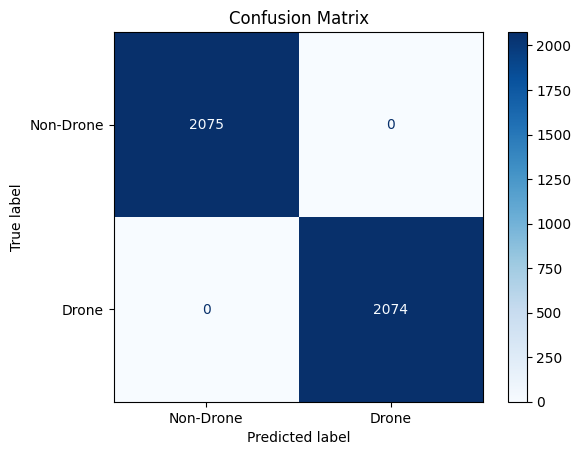

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reshape X_test
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Generate predictions
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict classes for the test set
y_pred_cnn = (model.predict(X_test_cnn) > 0.5).astype("int32")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_cnn))

# Display the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_cnn))


# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)

# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Drone', 'Drone']).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

### Now with a Random Forest

In [126]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess the dataset
data = pd.read_csv("Saraalemandi_All_Audio_10000.csv")
data['audio_features'] = data['audio_features'].apply(eval)
X = np.array(data['audio_features'].tolist())
y = np.array(data['is_drone'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Random Forest Output

Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2075
           1       1.00      1.00      1.00      2074

    accuracy                           1.00      4149
   macro avg       1.00      1.00      1.00      4149
weighted avg       1.00      1.00      1.00      4149


Confusion Matrix:
[[2075    0]
 [   0 2074]]


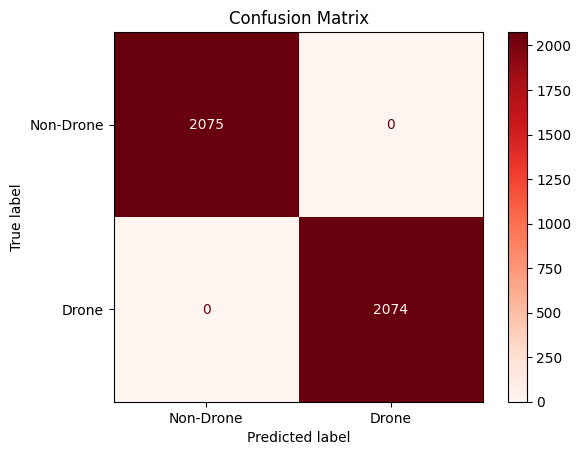

In [127]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)


# Display confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Drone', 'Drone']).plot(cmap='Reds')
plt.title("Confusion Matrix")
plt.show()


### Comparison of Models

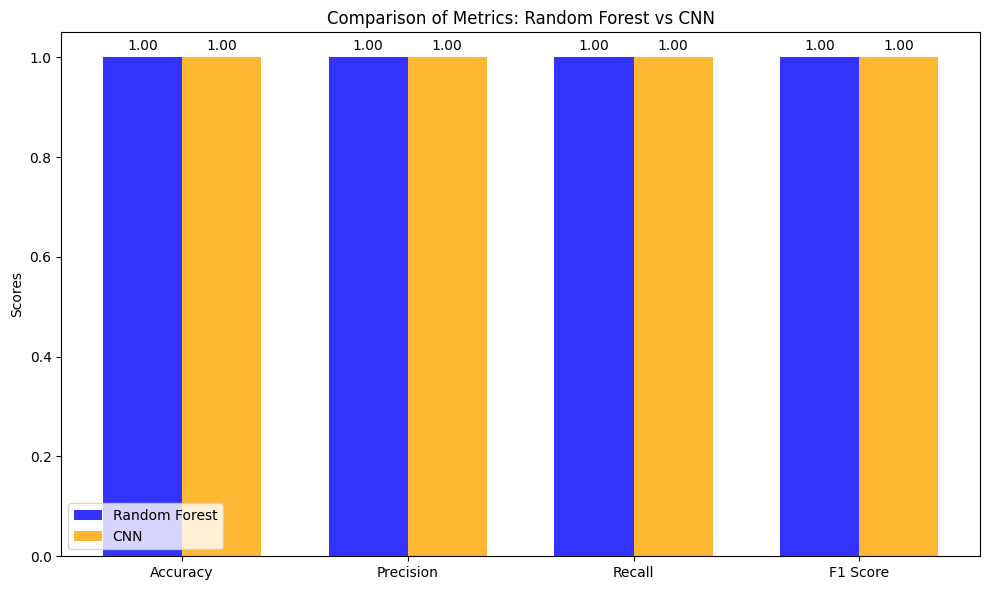

In [128]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming these predictions and labels are already defined:
# rf_y_pred: Predictions from the Random Forest model
# cnn_y_pred: Predictions from the CNN model
# y_test: True labels from the test set

# Compute metrics for Random Forest
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

# Compute metrics for CNN
cnn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_cnn),
    "Precision": precision_score(y_test, y_pred_cnn),
    "Recall": recall_score(y_test, y_pred_cnn),
    "F1 Score": f1_score(y_test, y_pred_cnn)
}

# Extract metric names and values
metrics = list(rf_metrics.keys())
rf_values = list(rf_metrics.values())
cnn_values = list(cnn_metrics.values())

# Plot the metrics for comparison
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars_rf = ax.bar(x - width/2, rf_values, width, label='Random Forest', alpha=0.8, color='blue')
bars_cnn = ax.bar(x + width/2, cnn_values, width, label='CNN', alpha=0.8, color='orange')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Comparison of Metrics: Random Forest vs CNN')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars
for bar in bars_rf + bars_cnn:
    ax.annotate(f'{bar.get_height():.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Why is output so perfect? - Data is clearly seperable
Drone sound is too different from random urbansounds. Peform PCA to show seperability. Only 109 non-drone points overlap with drone points

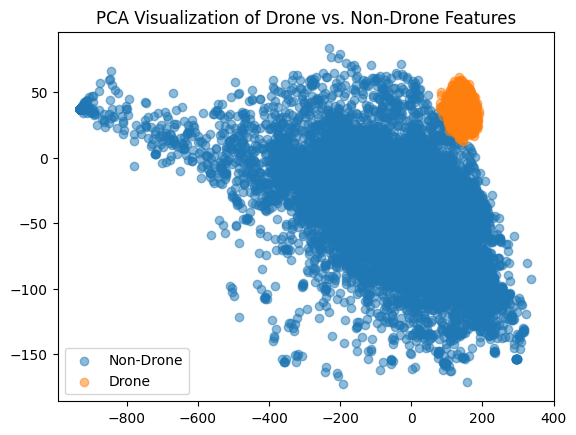

In [129]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the data
plt.scatter(X_reduced[y == 0, 0], X_reduced[y == 0, 1], label='Non-Drone', alpha=0.5)
plt.scatter(X_reduced[y == 1, 0], X_reduced[y == 1, 1], label='Drone', alpha=0.5)
plt.legend()
plt.title("PCA Visualization of Drone vs. Non-Drone Features")
plt.show()

### Try adding some noise

Epoch 1/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.8585e-06 - val_accuracy: 1.0000 - val_loss: 2.1631e-08
Epoch 2/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.2809e-06 - val_accuracy: 1.0000 - val_loss: 1.5591e-08
Epoch 3/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 4.7575e-06 - val_accuracy: 1.0000 - val_loss: 4.3828e-08
Epoch 4/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 9.1101e-07 - val_accuracy: 1.0000 - val_loss: 5.4081e-05
Epoch 5/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9969 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 6.6882e-08
Epoch 6/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 2.7907e-06 - val_accuracy: 1.0000 - val_loss: 3.1255e-08
Epoch 7/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.6606e-05 - val_accuracy: 1.0000 - val_loss: 2.3797e-06
Epoch 8/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step 

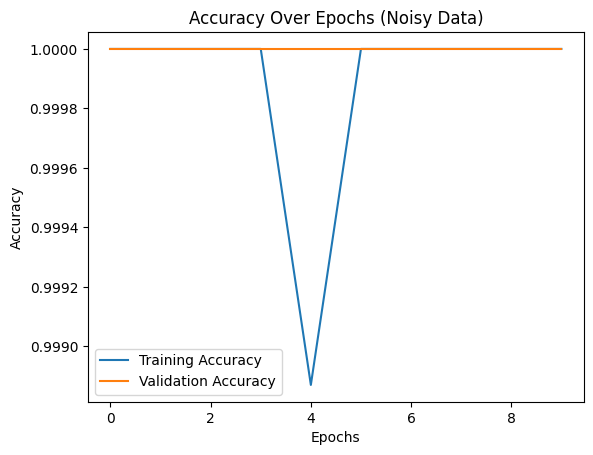

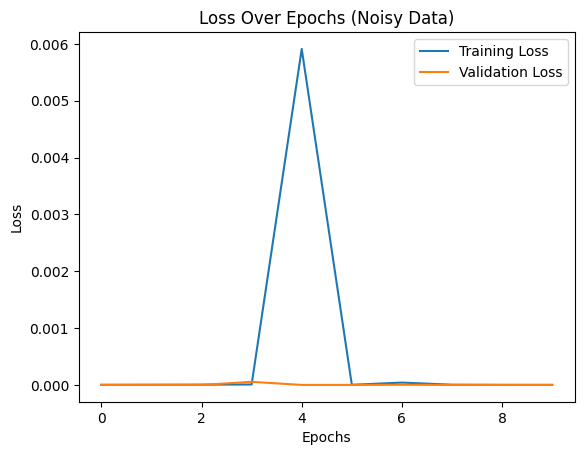

In [130]:
import numpy as np

# Add Gaussian noise to features
def add_noise(features, noise_level=100):
    noise = np.random.normal(0, noise_level, features.shape)
    return features + noise

X_train_noisy = add_noise(np.array(X_train), noise_level=0.1)
X_test_noisy = add_noise(np.array(X_test), noise_level=0.1)
# Reshape noisy data for CNN
X_train_cnn_noisy = X_train_noisy.reshape(X_train_noisy.shape[0], X_train_noisy.shape[1], 1)
X_test_cnn_noisy = X_test_noisy.reshape(X_test_noisy.shape[0], X_test_noisy.shape[1], 1)

history_noisy = model.fit(
    X_train_cnn_noisy, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)
test_loss_noisy, test_accuracy_noisy = model.evaluate(X_test_cnn_noisy, y_test)
print(f"Test Loss (Noisy): {test_loss_noisy}")
print(f"Test Accuracy (Noisy): {test_accuracy_noisy}")
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_noisy.history['accuracy'], label='Training Accuracy')
plt.plot(history_noisy.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs (Noisy Data)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_noisy.history['loss'], label='Training Loss')
plt.plot(history_noisy.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs (Noisy Data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
